# 1. Read contents of  iris.xls to python enviornment

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#adding into df dataframe
df = pd.read_excel('iris.xls')


# 2. Display the columns in the dataset.

In [190]:

df.columns


Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [192]:
df.shape  #finding the dimensions


(150, 5)

In [34]:
df.dtypes   # 4 numerical type and and 1 categorical data

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# 3. Calculate the mean of each column of the dataset.

In [48]:
# Using mean() function, 
#by default, it will result in mean of columns, axis = 0
#skipna = true to ignore null values
#numerical_only = True to avoid warning message, as Classification is an object or string. 

df.mean(skipna = True, numeric_only=True) 

SL    5.843333
SW    3.054000
PL    3.758667
PW    1.198667
dtype: float64

In [86]:
# Using describe() function to reconfirm 
df.describe()


,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 4. Check for the null values present in the dataset.

In [22]:
df.info()
#from the output we understand that there are no null values, showing 150 in all columns as non-null. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
#Another way to find null values 
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 5.Perform meaningful visualizations using the dataset. Bring at least 3 visualizations.

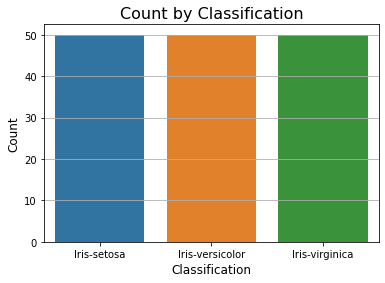

In [130]:
#Using countplot() to show the counts of observations in each categorical bin using bars.

ax = sns.countplot(x='Classification',data = df)
ax.set_title('Count by Classification',fontsize=16)
plt.xlabel('Classification',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis = 'y') #to show y grid lines 


Data insight 1:
A balanced dataset with 50 observations for each classification.

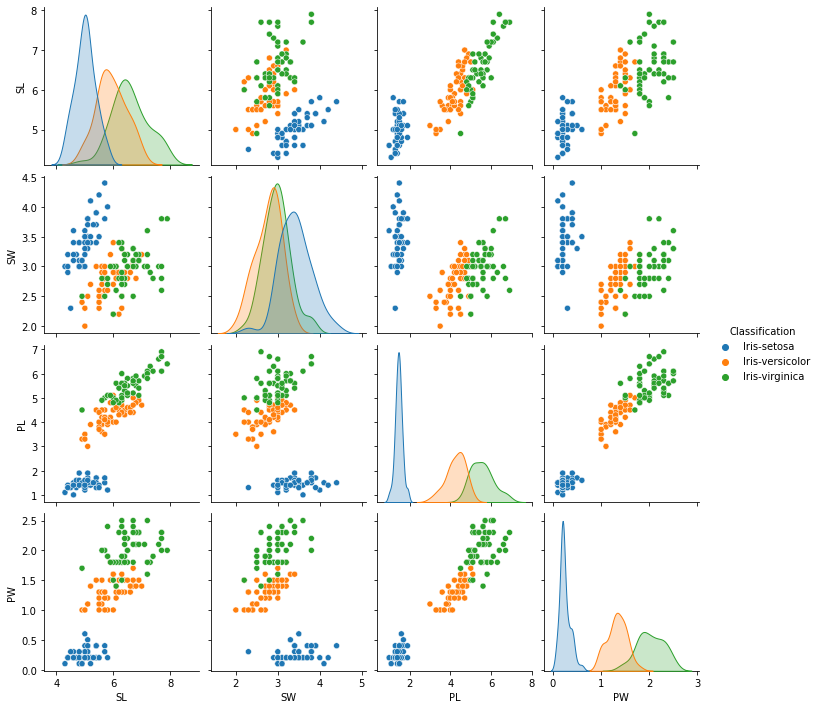

In [155]:
#trying a pairplot to see all possible combinations 
sns.pairplot(df,hue = 'Classification')

Insights:

We can see many correlations, particularly, for Iris-setosa, which is distingushing itself in blue colour from other two in many charts.

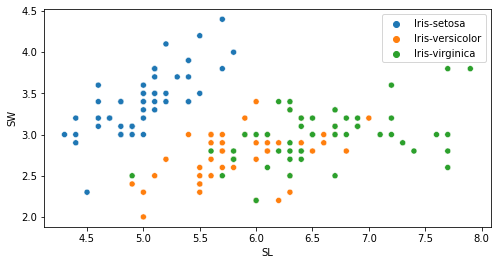

In [263]:
#Checking this further in a scatter plot, for Sepal Width and Sepal Length below. 
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='SL', y='SW',hue='Classification')
plt.legend()

We can see that Iris-setosa is distinguishable from other two. It has short but very wide sepals compared to other two species.

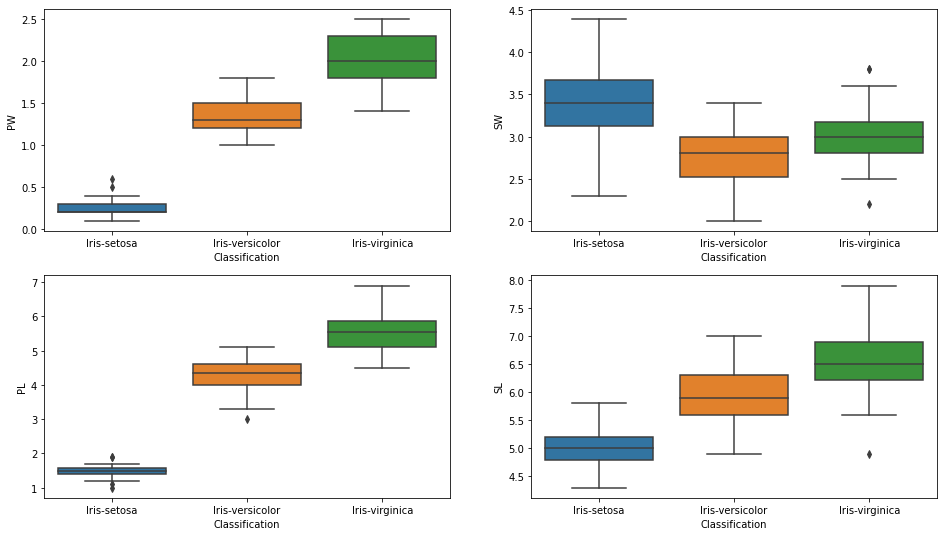

In [179]:
#boxplot to see how the categorical feature “Classification” is distributed with all other four input variables

fig, axes = plt.subplots(2, 2, figsize=(16,9)) #plotting 4 plots in 2 by 2 
sns.boxplot( y='PW', x= 'Classification', data=df, ax=axes[0, 0])
sns.boxplot( y='SW', x= 'Classification', data=df, ax=axes[0, 1])
sns.boxplot( y='PL', x= 'Classification', data=df, ax=axes[1, 0])
sns.boxplot( y='SL', x= 'Classification', data=df, ax=axes[1, 1])
plt.show()

Data insights:<br>
Comparing box plots of PL and PW<br>
   2.Iris-setosa has the smallest mean petal width and petal length<br>
   3.Iris-versicolor has average  petal width and petal length <br>
   4.Iris-Viginica  has the largest mean petal width and length<br>
    
Comparing box plots of SW and SL <br>
   5.Iris-setosa may have the smallest mean sepal length, but its sepal is the widest.<br>
   6.Iris-versicolor has the narrowest sepal.(smallest mean sepal width)<br>
   7.Iris-viginica has the longest sepal. (largest mean sepal length)<br>
    

<AxesSubplot:>

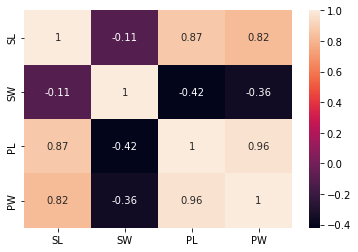

In [264]:
#find correlation with heat maps. 
sns.heatmap(df.corr(),annot=True)

Heat map shows a good correlation between Petal length and Petal width of 0.96. 

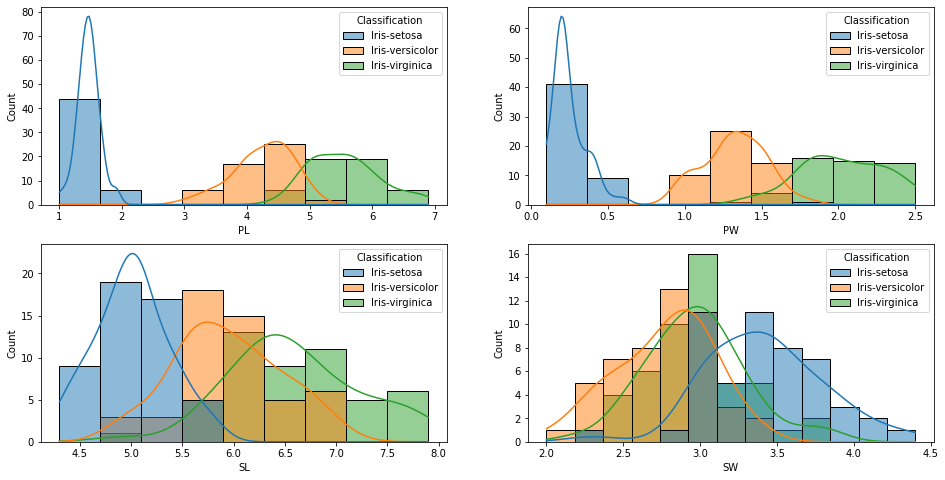

<Figure size 432x288 with 0 Axes>

In [291]:
#Distribution plot of PL and PW, SL and SW

figure, axes = plt.subplots(2, 2,figsize =(16,8))


sns.histplot(df,x='PL',hue='Classification',kde=True,ax=axes[0,0])
sns.histplot(df,x='PW',hue='Classification',kde=True,ax=axes[0,1])
sns.histplot(df,x='SL',hue='Classification',kde=True,ax=axes[1,0])
sns.histplot(df,x='SW',hue='Classification',kde=True,ax=axes[1,1])


plt.show()
plt.tight_layout()


As seen in the heatmap, and confirming here, PL and then PW are good features to identify the species